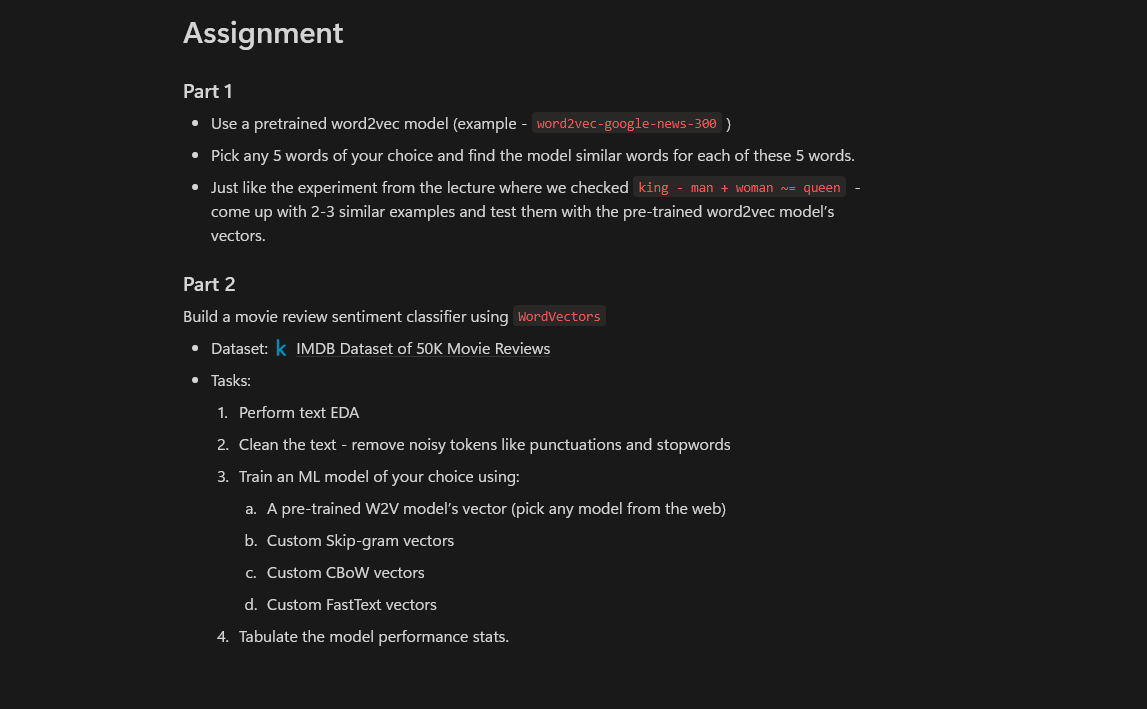

## Part - 1

### Installing gensim

In [1]:
!pip install gensim

  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/2d/30/074bac7a25866a2807c1005c7852c0139ac22ba837871fc01f16df29b9dc/FuzzyTM-2.0.9-py3-none-any.whl.metadata
  Using cached FuzzyTM-2.0.9-py3-none-any.whl.metadata (7.9 kB)
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/ed/ea/a3b120e251145dcdb10777f2bc5f18b1496fd999d705a178c1b0ad947ce1/pyFUME-0.3.4-py3-none-any.whl.metadata
  Using cached pyFUME-0.3.4-py3-none-any.whl.metadata (9.7 kB)
  Obtaining dependency information for scipy>=1.7.0 from https://files.pythonhosted.org/packages/65/76/903324159e4a3566e518c558aeb21571d642f781d842d8dd0fd9c6b0645a/scipy-1.10.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl.metadata (58 kB)
  Obtaining dependency information for simpful==2.12.0 from https://files.pythonhosted.org/packages/9d/0e/aebc2fb0b0f481994179b2ee2b8e6bbf0894d971594688c018375e7076ea/simpful-2.12.0-py3-n

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.4.35 requires ml-dtypes>=0.4.0, but you have ml-dtypes 0.2.0 which is incompatible.
mediapipe 0.10.14 requires protobuf<5,>=4.25.3, but you have protobuf 5.29.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.
supervisely 6.73.338 requires anyio<=4.2.0,>=3.7.1, but you have anyio 4.9.0 which is incompatible.
supervisely 6.73.338 requires httpx[http2]==0.27.2, but you have httpx 0.28.1 which is incompatible.
supervisely 6.73.338 requires protobuf<=3.20.3,>=3.19.5, but you have protobuf 5.29.4 which is incompatible.
supervisely 6.73.338 requires pydantic<=2.8.2,>=1.7.4, but you have pydantic 2.11.3 which is incompatible.


In [2]:
import gensim.downloader as api
import warnings
warnings.filterwarnings('ignore')

# Download the pre-trained model. This will take some time.
print("Downloading model...")
model = api.load('word2vec-google-news-300')
print("Model loaded successfully.")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model loaded successfully.


### Finding Similar Words

In [3]:
# Find similar words for 5 chosen words
words = ["python", "apple", "city", "music", "doctor"]

for word in words:
    try:
        similar_words = model.most_similar(word)
        print(f"\nTop 5 similar words to '{word}':")
        for similar_word, score in similar_words[:5]:
            print(f"  - {similar_word} (Similarity: {score:.4f})")
    except KeyError:
        print(f"Word '{word}' not in the vocabulary.")


Top 5 similar words to 'python':
  - pythons (Similarity: 0.6688)
  - Burmese_python (Similarity: 0.6680)
  - snake (Similarity: 0.6606)
  - crocodile (Similarity: 0.6591)
  - boa_constrictor (Similarity: 0.6444)

Top 5 similar words to 'apple':
  - apples (Similarity: 0.7204)
  - pear (Similarity: 0.6451)
  - fruit (Similarity: 0.6410)
  - berry (Similarity: 0.6302)
  - pears (Similarity: 0.6134)

Top 5 similar words to 'city':
  - citys (Similarity: 0.6804)
  - mayor (Similarity: 0.6751)
  - town (Similarity: 0.6724)
  - municipality (Similarity: 0.6531)
  - municipal (Similarity: 0.6223)

Top 5 similar words to 'music':
  - classical_music (Similarity: 0.7198)
  - jazz (Similarity: 0.6835)
  - Music (Similarity: 0.6596)
  - Without_Donny_Kirshner (Similarity: 0.6416)
  - songs (Similarity: 0.6396)

Top 5 similar words to 'doctor':
  - physician (Similarity: 0.7806)
  - doctors (Similarity: 0.7477)
  - gynecologist (Similarity: 0.6948)
  - surgeon (Similarity: 0.6793)
  - dentist (S

### Word Analogies

In [4]:
# Test word analogies

# Example 1: Gender Analogy
print("\nAnalogy: brother - man + woman")
result1 = model.most_similar(positive=['brother', 'woman'], negative=['man'], topn=1)
print(f"Result: {result1[0][0]} (Similarity: {result1[0][1]:.4f})")
# Expected: sister

# Example 2: Capital City Analogy
print("\nAnalogy: Berlin - Germany + France")
result2 = model.most_similar(positive=['Berlin', 'France'], negative=['Germany'], topn=1)
print(f"Result: {result2[0][0]} (Similarity: {result2[0][1]:.4f})")
# Expected: Paris

# Example 3: Verb Tense Analogy
print("\nAnalogy: walking - walk + ran")
result3 = model.most_similar(positive=['walking', 'ran'], negative=['walk'], topn=1)
print(f"Result: {result3[0][0]} (Similarity: {result3[0][1]:.4f})")
# Expected: running


Analogy: brother - man + woman
Result: sister (Similarity: 0.8103)

Analogy: Berlin - Germany + France
Result: Paris (Similarity: 0.7672)

Analogy: walking - walk + ran
Result: running (Similarity: 0.5351)


## Part - 2

### Build a movie review sentiment classifier using WordVectors

In [6]:
import pandas as pd
import numpy as np
import re
import warnings
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
import gensim.downloader as api
from gensim.models import Word2Vec, FastText
from tqdm import tqdm

warnings.filterwarnings('ignore')

def load_data(file_path):
    """Loads the dataset and performs initial EDA."""
    try:
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully.")
        print("\n--- Dataset Info ---")
        df.info()
        print("\n--- First 5 rows ---")
        print(df.head())
        print("\n--- Class distribution ---")
        print(df['sentiment'].value_counts())
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        print("Please download the 'IMDB Dataset.csv' from Kaggle and place it in the same directory.")
        return None

def clean_text(text):
    """Cleans a single text string."""
    # Remove HTML tags using a regular expression
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    return filtered_tokens

def create_document_vectors(model, documents):
    """
    Averages the word vectors for each document to create a single document vector.
    
    This function handles Out-of-Vocabulary (OOV) words by skipping them.
    """
    doc_vectors = []
    vector_size = model.vector_size
    for doc in tqdm(documents, desc="Creating document vectors"):
        # Filter out words not in the model's vocabulary
        filtered_words = [word for word in doc if word in model.wv]
        if filtered_words:
            # Average the vectors of the words in the document
            doc_vector = np.mean([model.wv[word] for word in filtered_words], axis=0)
        else:
            # If no words are in the vocabulary, return a zero vector
            doc_vector = np.zeros(vector_size)
        doc_vectors.append(doc_vector)
    return np.array(doc_vectors)

def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    """Trains a Logistic Regression model and evaluates its performance."""
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='positive')
    recall = recall_score(y_test, y_pred, pos_label='positive')
    f1 = f1_score(y_test, y_pred, pos_label='positive')
    
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}

def main():
    """Main function to run the entire pipeline."""
    # Load and clean data
    file_path = r'C:\Users\laava\Desktop\sem 7\NLP\IMDB_Dataset.csv'
    df = load_data(file_path)
    if df is None:
        return

    print("\n--- Cleaning and Tokenizing Text ---")
    df['cleaned_review'] = [clean_text(review) for review in tqdm(df['review'], desc="Cleaning reviews")]
    
    # Split the data
    X = df['cleaned_review']
    y = df['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Define models to test
    models_to_evaluate = {}

    # 1. Pre-trained Word2Vec
    print("\n--- Training with Pre-trained Word2Vec ---")
    try:
        # Load pre-trained model
        pretrained_w2v_model = api.load("word2vec-google-news-300")
        X_train_w2v = create_document_vectors(pretrained_w2v_model, X_train)
        X_test_w2v = create_document_vectors(pretrained_w2v_model, X_test)
        models_to_evaluate['Pre-trained Word2Vec'] = (X_train_w2v, X_test_w2v)
    except Exception as e:
        print(f"Failed to load pre-trained Word2Vec model: {e}")

    # 2. Custom Skip-gram vectors (Word2Vec with sg=1)
    print("\n--- Training with Custom Skip-gram vectors ---")
    custom_skipgram = Word2Vec(sentences=X_train, vector_size=300, window=5, min_count=2, workers=4, sg=1)
    X_train_skipgram = create_document_vectors(custom_skipgram, X_train)
    X_test_skipgram = create_document_vectors(custom_skipgram, X_test)
    models_to_evaluate['Custom Skip-gram'] = (X_train_skipgram, X_test_skipgram)
    
    # 3. Custom CBOW vectors (Word2Vec with sg=0)
    print("\n--- Training with Custom CBOW vectors ---")
    custom_cbow = Word2Vec(sentences=X_train, vector_size=300, window=5, min_count=2, workers=4, sg=0)
    X_train_cbow = create_document_vectors(custom_cbow, X_train)
    X_test_cbow = create_document_vectors(custom_cbow, X_test)
    models_to_evaluate['Custom CBOW'] = (X_train_cbow, X_test_cbow)

    # 4. Custom FastText vectors
    print("\n--- Training with Custom FastText vectors ---")
    custom_fasttext = FastText(sentences=X_train, vector_size=300, window=5, min_count=2, workers=4)
    X_train_fasttext = create_document_vectors(custom_fasttext, X_train)
    X_test_fasttext = create_document_vectors(custom_fasttext, X_test)
    models_to_evaluate['Custom FastText'] = (X_train_fasttext, X_test_fasttext)
    
    # Evaluate models and store results
    results = []
    for model_name, (X_train_vec, X_test_vec) in models_to_evaluate.items():
        print(f"\n--- Evaluating {model_name} ---")
        stats = train_and_evaluate_model(X_train_vec, y_train, X_test_vec, y_test)
        stats['Model'] = model_name
        results.append(stats)

    # Tabulate the results
    if results:
        df_results = pd.DataFrame(results).set_index('Model')
        print("\n" + "="*50)
        print("         MODEL PERFORMANCE STATISTICS")
        print("="*50)
        print(tabulate(df_results, headers='keys', tablefmt='psql', floatfmt=".4f"))
        print("="*50)
    else:
        print("No models were successfully evaluated.")

if __name__ == "__main__":
    main()

Dataset loaded successfully.

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB

--- First 5 rows ---
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

--- Class distribution ---
positive    25000
negative    25000
Name: sentiment, dtype: int64

--- Cleaning and Tokenizing Text ---


Cleaning reviews: 100%|██████████| 50000/50000 [00:27<00:00, 1786.83it/s]



--- Training with Pre-trained Word2Vec ---


Creating document vectors:   0%|          | 0/40000 [00:00<?, ?it/s]


Failed to load pre-trained Word2Vec model: 'KeyedVectors' object has no attribute 'wv'

--- Training with Custom Skip-gram vectors ---


Creating document vectors: 100%|██████████| 10000/10000 [00:01<00:00, 6255.74it/s]



--- Training with Custom CBOW vectors ---


Creating document vectors: 100%|██████████| 10000/10000 [00:01<00:00, 6248.89it/s]



--- Training with Custom FastText vectors ---


Creating document vectors: 100%|██████████| 10000/10000 [00:02<00:00, 3414.72it/s]



--- Evaluating Custom Skip-gram ---

--- Evaluating Custom CBOW ---

--- Evaluating Custom FastText ---

         MODEL PERFORMANCE STATISTICS
+------------------+------------+-------------+----------+------------+
| Model            |   accuracy |   precision |   recall |   f1_score |
|------------------+------------+-------------+----------+------------|
| Custom Skip-gram |     0.8855 |      0.8863 |   0.8844 |     0.8854 |
| Custom CBOW      |     0.8621 |      0.8603 |   0.8646 |     0.8624 |
| Custom FastText  |     0.8499 |      0.8483 |   0.8522 |     0.8502 |
+------------------+------------+-------------+----------+------------+
